# GOAL: 시청률 회귀 분석을 통해 CF를 어느 채널/시간대에 넣을 것인지 결정

# 1.데이터 전처리

## 1.1. 데이터 기초 현황 파악

In [137]:
column_explain = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/K-드라마 프로그램 출연진정보 채_컬럼정의서.xlsx'
data0_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202109.csv'
data1_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202110.csv'
data2_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202111.csv'
test_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202112.csv'

In [ ]:
# xlsx 파일을 불러오기위해서 xlrd를 최신 버전으로 업그레이드 해준다. #다른 것들도 다 install 
! pip install --upgrade xlrd
! pip install shap
! pip install pdpbox
! pip install eli5
! pip install category_encoders

In [139]:
import pandas as pd
import openpyxl
import xlrd

column_explain = pd.read_excel(column_explain)

In [140]:
column_explain

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,BRDCST_DE,방송일자,VARCHAR,8,Y,Y
1,2,BRDCST_END_DE,방송종료일자,VARCHAR,8,Y,Y
2,3,CHNNEL_NM,채널명,VARCHAR,200,Y,Y
3,4,PROGRM_BEGIN_TIME,프로그램시작시간,VARCHAR,6,Y,Y
4,5,PROGRM_END_TIME,프로그램종료시간,VARCHAR,6,N,Y
5,6,PROGRM_NM,프로그램명,VARCHAR,200,N,Y
6,7,PROGRM_DC,프로그램설명,VARCHAR,500,N,N
7,8,BRDCST_TME_NM,방송회차명,VARCHAR,200,N,N
8,9,PROGRM_BRDCST_AREA_NM,프로그램방송지역명,VARCHAR,200,N,Y
9,10,BRDCST_TIME,방송시간,VARCHAR,6,N,Y


In [234]:
df0 = pd.read_csv(data0_url)
df0.info()
df0.head()
## 전체 4509

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4509 non-null   int64  
 1   BRDCST_END_DE                4509 non-null   int64  
 2   CHNNEL_NM                    4509 non-null   object 
 3   PROGRM_BEGIN_TIME            4509 non-null   int64  
 4   PROGRM_END_TIME              4509 non-null   int64  
 5   PROGRM_NM                    4509 non-null   object 
 6   PROGRM_DC                    33 non-null     object 
 7   BRDCST_TME_NM                4487 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4509 non-null   object 
 9   BRDCST_TIME                  4509 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4509 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4509 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4509 non-null   object 
 13  MALE_4_9YO_WTCHNG_

,BRDCST_DE,BRDCST_END_DE,CHNNEL_NM,PROGRM_BEGIN_TIME,PROGRM_END_TIME,PROGRM_NM,PROGRM_DC,BRDCST_TME_NM,PROGRM_BRDCST_AREA_NM,BRDCST_TIME,...,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT,CST_CN
0,20210901,20210901,KBS1,203112,205919,속아도꿈결,NaN,98회,전국,2807,...,5.78830,17.46663,1.01454,1.30062,1.51997,3.11875,4.55390,12.46363,18.90274,"금종화역:최정우,강모란역:박준금,금상백역:류진,인영혜역:박탐희,금상구역:임형준,오민..."
1,20210901,20210901,KBS2,92259,95100,속아도꿈결,NaN,97회,전국,2801,...,1.97050,1.25558,0.00000,0.55388,0.33854,0.13986,0.56691,2.02778,1.94509,"금종화역:최정우,강모란역:박준금,금상백역:류진,인영혜역:박탐희,금상구역:임형준,오민..."
2,20210901,20210901,KBS2,195053,202630,빨강구두,NaN,32회,전국,3537,...,6.81132,18.65608,2.94364,2.28178,2.07667,4.97292,4.92582,14.83816,22.40254,"민희경역:최명길,김진아역:소이현,윤기석역:박윤재,윤현석역:신정윤,권혜빈역:정유민,권..."
3,20210901,20210901,MBC,85223,92144,두번째남편,NaN,16회,전국,2921,...,1.58663,1.24675,0.20506,0.83963,0.20008,0.78139,0.97325,1.14983,1.78425,"봉선화역:엄현경,윤재민역:차서원,윤재경역:오승아,문상혁역:한기웅,주해란역:지수원,윤..."
4,20210901,20210901,MBC,190240,193206,두번째남편,NaN,17회,전국,2926,...,1.79500,5.27036,0.17365,0.79180,0.41742,1.87828,1.31816,4.54236,5.83274,"봉선화역:엄현경,윤재민역:차서원,윤재경역:오승아,문상혁역:한기웅,주해란역:지수원,윤..."


In [142]:
df1 = pd.read_csv(data1_url)
df1.info(), df1.head()
## 전체 4819
df1['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4819 non-null   int64  
 1   BRDCST_END_DE                4819 non-null   int64  
 2   CHNNEL_NM                    4819 non-null   object 
 3   PROGRM_BEGIN_TIME            4819 non-null   int64  
 4   PROGRM_END_TIME              4819 non-null   int64  
 5   PROGRM_NM                    4819 non-null   object 
 6   PROGRM_DC                    89 non-null     object 
 7   BRDCST_TME_NM                4799 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4819 non-null   object 
 9   BRDCST_TIME                  4819 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4819 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4819 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4819 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211001, 20211002, 20211003, 20211004, 20211005, 20211006,
       20211007, 20211008, 20211009, 20211010, 20211011, 20211012,
       20211013, 20211014, 20211015, 20211016, 20211017, 20211018,
       20211019, 20211020, 20211021, 20211022, 20211023, 20211024,
       20211025, 20211026, 20211027, 20211028, 20211029, 20211030,
       20211031, 20211101])

In [143]:
df2 = pd.read_csv(data2_url)
df2.info(), df2.head()
## 전체 4711
df2['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4711 non-null   int64  
 1   BRDCST_END_DE                4711 non-null   int64  
 2   CHNNEL_NM                    4711 non-null   object 
 3   PROGRM_BEGIN_TIME            4711 non-null   int64  
 4   PROGRM_END_TIME              4711 non-null   int64  
 5   PROGRM_NM                    4711 non-null   object 
 6   PROGRM_DC                    46 non-null     object 
 7   BRDCST_TME_NM                4680 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4711 non-null   object 
 9   BRDCST_TIME                  4711 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4711 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4711 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4711 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211101, 20211102, 20211103, 20211104, 20211105, 20211106,
       20211107, 20211108, 20211109, 20211110, 20211111, 20211112,
       20211113, 20211114, 20211115, 20211116, 20211117, 20211118,
       20211119, 20211120, 20211121, 20211122, 20211123, 20211124,
       20211125, 20211126, 20211127, 20211128, 20211129, 20211130,
       20211201])

In [144]:
test = pd.read_csv(test_url)
test.info(), test.head()
## 전체 5315
test['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    5315 non-null   int64  
 1   BRDCST_END_DE                5315 non-null   int64  
 2   CHNNEL_NM                    5315 non-null   object 
 3   PROGRM_BEGIN_TIME            5315 non-null   int64  
 4   PROGRM_END_TIME              5315 non-null   int64  
 5   PROGRM_NM                    5315 non-null   object 
 6   PROGRM_DC                    71 non-null     object 
 7   BRDCST_TME_NM                5298 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        5315 non-null   object 
 9   BRDCST_TIME                  5315 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        5315 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        5315 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        5315 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211201, 20211202, 20211203, 20211204, 20211205, 20211206,
       20211207, 20211208, 20211209, 20211210, 20211211, 20211212,
       20211213, 20211214, 20211215, 20211216, 20211217, 20211218,
       20211219, 20211220, 20211221, 20211222, 20211223, 20211224,
       20211225, 20211226, 20211227, 20211228, 20211229, 20211230,
       20211231, 20220101])

## 1.2. 데이터 결합

In [145]:
# df0, df1, df2 모두 9, 10, 11월 값. test는 12월 값
# concat으로 합친 후, 중복 값 확인. 
df = pd.concat([df0, df1, df2], ignore_index = True)
df_ori = pd.concat([df0, df1, df2], ignore_index = True)

In [146]:
print(len(df) == len(df1) + len(df2) + len(df0)) #정상적으로 합쳐짐.
df.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14039 entries, 0 to 14038
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    14039 non-null  int64  
 1   BRDCST_END_DE                14039 non-null  int64  
 2   CHNNEL_NM                    14039 non-null  object 
 3   PROGRM_BEGIN_TIME            14039 non-null  int64  
 4   PROGRM_END_TIME              14039 non-null  int64  
 5   PROGRM_NM                    14039 non-null  object 
 6   PROGRM_DC                    168 non-null    object 
 7   BRDCST_TME_NM                13966 non-null  object 
 8   PROGRM_BRDCST_AREA_NM        14039 non-null  object 
 9   BRDCST_TIME                  14039 non-null  int64  
 10  PROGRM_GENRE_LCLAS_NM        14039 non-null  object 
 11  PROGRM_GENRE_MLSFC_NM        14039 non-null  object 
 12  PROGRM_GENRE_SCLAS_NM        14039 non-null  object 
 13  MALE_4_9YO_

In [147]:
df.duplicated().sum() #중복 없음.

0

## 1.3. 특성 공학 진행

In [148]:
## 특성을 엔지니어링 하는 함수 생성 ## 

def engineer(df):

  # begin time conver to 'A','B','C', etc. def
  def convert_time(x):
    if (x >= 000000) & (x <= 25959):
      return "A"
    if x >= 30000 and x <= 55959:
      return "B"
    if x >= 60000 and x <= 85959:
      return "C"
    if x >= 90000 and x <= 115959:
      return "D"
    if x >= 120000 and x <= 145959:
      return "E"
    if x >= 150000 and x <= 175959:
      return "F"
    if x >= 180000 and x <= 205959:
      return "G"
    if x >= 210000 and x <= 235959:
      return "H"
  df['PROGRM_BEGIN_TIME'] = df['PROGRM_BEGIN_TIME'].apply(convert_time)

  ## 컬럼명 변경
  df.rename(columns = {'BRDCST_DE' : 'date',
                     'CHNNEL_NM' : 'chanel',
                     'PROGRM_BEGIN_TIME' : 'time',
                     'PROGRM_NM' : 'name',
                     'PROGRM_GENRE_SCLAS_NM' : 'genre',
                     'MALE_N20S_WTCHNG_RT' : 'm_20',
                     'MALE_N30S_WTCHNG_RT' : 'm_30',
                     'FEMALE_N20S_WTCHNG_RT' : 'f_20',
                     'FEMALE_N30S_WTCHNG_RT' : 'f_30',
                     'CST_CN' : 'casting'}, inplace = True)
  ###컬럼삭제
  delete_columns = ['BRDCST_END_DE','PROGRM_DC', 'BRDCST_TME_NM', 
                  'PROGRM_BRDCST_AREA_NM','PROGRM_GENRE_LCLAS_NM', 
                  'PROGRM_GENRE_MLSFC_NM', 'PROGRM_END_TIME', 
                  'BRDCST_TIME', 'MALE_4_9YO_WTCHNG_RT',
                  'MALE_N10S_WTCHNG_RT', 'MALE_N40S_WTCHNG_RT',
                  'MALE_N50S_WTCHNG_RT','MALE_N60S_ABOVE_WTCHNG_RT',
                  'FEMALE_4_9YO_WTCHNG_RT','FEMALE_N10S_WTCHNG_RT',
                  'FEMALE_N40S_WTCHNG_RT','FEMALE_N50S_WTCHNG_RT',
                  'FEMALE_N60S_ABOVE_WTCHNG_RT', 'date', 'casting']
  df.drop(columns = delete_columns, axis = 1, inplace=True)

  return df

In [149]:
train = engineer(df)
test = engineer(test)

In [150]:
train.head()

,chanel,time,name,genre,m_20,m_30,f_20,f_30
0,KBS1,G,속아도꿈결,일일연속극,2.09781,3.07116,1.51997,3.11875
1,KBS2,D,속아도꿈결,일일연속극,0.22904,0.50181,0.33854,0.13986
2,KBS2,G,빨강구두,일일연속극,2.08174,4.12124,2.07667,4.97292
3,MBC,C,두번째남편,일일연속극,0.32441,0.38374,0.20008,0.78139
4,MBC,G,두번째남편,일일연속극,0.31510,1.94320,0.41742,1.87828


In [151]:
train.shape, test.shape

((14039, 8), (5315, 8))

## 1.4. 훈련/검증/테스트 데이터 분리

In [152]:
from sklearn.model_selection import train_test_split
target = 'm_30'
train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 2)

In [153]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [154]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((11231, 7), (2808, 7), (11231,), (2808,), (5315, 7), (5315,))

In [155]:
print(len(df.shape) == len(train.shape))

True


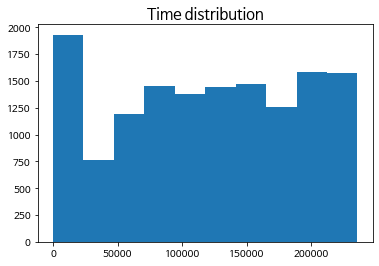

In [156]:
### 기존 숫자형태로 되어있던 시간 분포 
import matplotlib.pyplot as plt
colors = ['#E76939', '#9B2B5A', '#E50E45', '#6D045E','#022A76', '#191232',
          '#F4B951', '#055156', '#A6D26A', '#13BC81','#252848', '#076F50']
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.hist(df_ori['PROGRM_BEGIN_TIME'])
plt.show()

In [157]:
y_axis = X_train['time'].value_counts()
y_axis
x_axis = ['A', 'B', 'C', 'D','E','F','G','H']

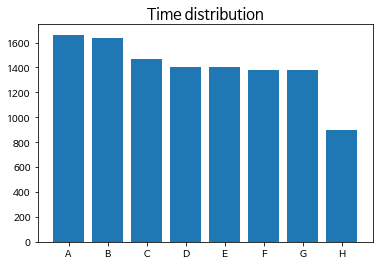

In [158]:
### 새롭게 A,B,C,,, H 24시간을 8개의 시간대로 구분한 시간대 
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.bar(x_axis, y_axis)
plt.show()

In [159]:
y_train.sort_values(ascending=False).describe()

count    11231.000000
mean         0.153702
std          0.519265
min          0.000000
25%          0.000000
50%          0.018400
75%          0.094365
max          8.133860
Name: m_30, dtype: float64

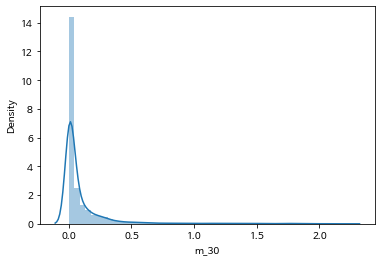

In [160]:
import seaborn as sns
import numpy as np
from scipy import stats
sns.distplot(np.log1p(y_train))

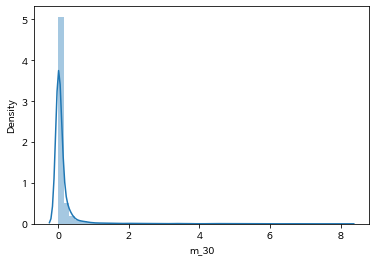

In [161]:
sns.distplot((y_train))

In [162]:
yy_train = df[df['m_30'] < np.percentile(df['m_30'], 99.5)]['m_30']
yy_train.describe()
df.shape

(14039, 8)

In [163]:
yy_train = (y_train < np.percentile(y_train, 99.5))
yy_train = (yy_train > np.percentile(y_train, 99.5))

In [164]:
yy_train

12124    False
4351     False
9293     False
5490     False
5873     False
         ...  
11798    False
13896    False
6637     False
2575     False
7336     False
Name: m_30, Length: 11231, dtype: bool

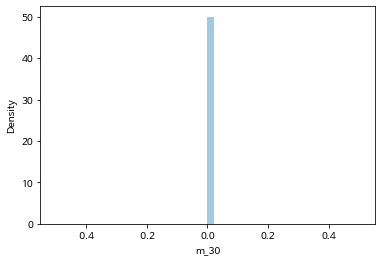

In [165]:
sns.distplot(np.log1p(yy_train))

In [166]:
y_train.isnull().sum()
y_train

12124    0.00838
4351     0.83864
9293     0.00753
5490     0.07578
5873     0.00000
          ...   
11798    0.23889
13896    0.09357
6637     0.02528
2575     0.01436
7336     0.00000
Name: m_30, Length: 11231, dtype: float64

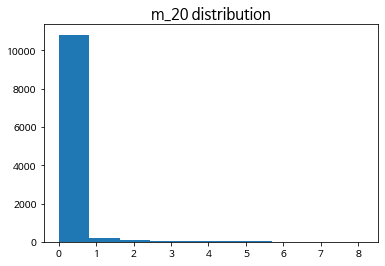

In [167]:
import numpy as np 
plt.figure(figsize=(6,4))
plt.title('m_20 distribution', size = 15)
plt.hist(y_train)
plt.show()

# 2.모델 설정 및 평가

## 2.1. Baseline 설정 및 평가지표 확인

In [168]:
baseline = y_train.mean()
baseline

0.1537021556406375

### 2.1.1. 훈련 데이터 세트

BaseLine_훈련 세트 r2: 0.0000000000
BaseLine_훈련 세트 MSE: 0.2696117100
------------------------------------------------------------


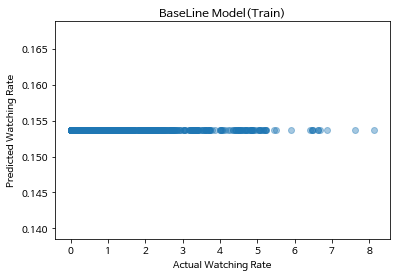

In [169]:
# 기준모델로 훈련 R2, MSE 계산
from sklearn.metrics import r2_score, mean_squared_error
y_pred = [baseline] * len(y_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'BaseLine_훈련 세트 r2: {r2:.10f}')
print(f'BaseLine_훈련 세트 MSE: {mse:.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("BaseLine Model(Train)")
plt.show()

### 2.1.2. 검증 데이터 세트

BaseLine_검증 세트 r2: -0.0002229936
BaseLine_검증 세트 MSE: 0.3085190294
------------------------------------------------------------


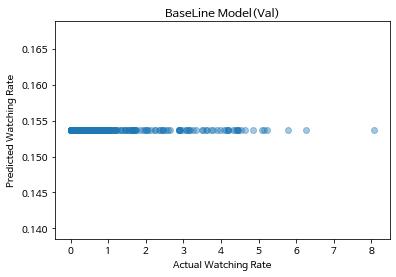

In [170]:
# 기준모델로 검증 에러 계산
y_pred = [baseline] * len(y_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f'BaseLine_검증 세트 r2: {r2:.10f}')
print(f'BaseLine_검증 세트 MSE: {mse:.10f}')
# it can be negative (because the model can be arbitarily worse)
# 음수가 될 수도 있다. 모델이 악화될 수도 있기 때문. (즉 모델이 garbage....)
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("BaseLine Model(Val)")
plt.show()

### 2.1.2. 테스트 데이터 세트

BaseLine_테스트 세트 r2: -0.0000344486
BaseLine_테스트 세트 MSE: 0.3085190294
------------------------------------------------------------


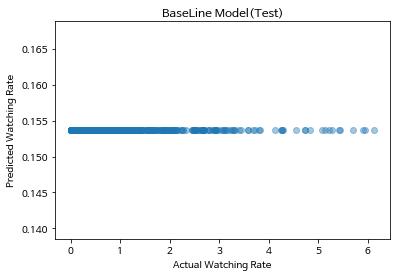

In [171]:
# 테스트 에러(MAE)
y_pred = [baseline] * len(y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print(f'BaseLine_테스트 세트 r2: {r2:.10f}')
print(f'BaseLine_테스트 세트 MSE: {mse:.10f}')
print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("BaseLine Model(Test)")
plt.show()

## 2.2. RandomForestRegression RandomizedSearchCV 모델 적용 및 평가지표 확인

In [173]:
## LinearRegression
from sklearn.preprocessing import MinMaxScaler #MinMax로 정규화
from sklearn.ensemble import RandomForestRegressor #RandomForest회귀분석
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import f1_score, roc_auc_score
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")

# 컬럼 정규화 
scaled_columns = ['m_20', 'f_20', 'f_30']
scaler = MinMaxScaler().fit(X_train[scaled_columns])

pipeline = make_pipeline(
    TargetEncoder(cols = ['chanel', 'time', 'name', 'genre']),
    RandomForestRegressor(n_jobs=-1)
    )

dists = { 
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, 25, None],
    'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'randomforestregressor__min_samples_split': [2, 3, 4, 5, 6, 7],
    }

clf = RandomizedSearchCV(
    pipeline,
    param_distributions= dists, 
    n_iter=8, 
    cv=5, 
    scoring='neg_mean_squared_error',  
    verbose=1,
    refit=True,
    n_jobs=-2
    )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('targetencoder',
                                              TargetEncoder(cols=['chanel',
                                                                  'time',
                                                                  'name',
                                                                  'genre'])),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=-1))]),
                   n_iter=8, n_jobs=-2,
                   param_distributions={'randomforestregressor__max_depth': [5,
                                                                             10,
                                                                             15,
                                                                             20,
                                                                             25,
            

### 2.2.1. 훈련 데이터 세트

RandomForestRegressor_훈련 세트 r2: 0.9481815248
RandomForestRegressor_훈련 세트 조정된 r2: 0.9481492046
RandomForestRegressor_훈련 세트 MSE: 0.0139708677
------------------------------------------------------------


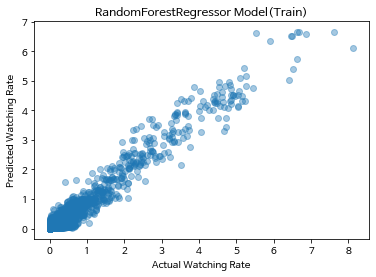

In [220]:
## train  - 랜덤포레스트 최적화된 하이퍼파라미터로 오류 확인
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
pipe = clf.best_estimator_
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)

print(f'RandomForestRegressor_훈련 세트 r2: {r2:.10f}')
print(f'RandomForestRegressor_훈련 세트 조정된 r2: {adj_r2(r2, X_train.shape[0], X_train.shape[1]):.10f}')
print(f'RandomForestRegressor_훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("RandomForestRegressor Model(Train)")
plt.show()


### 2.2.2. 검증 데이터 세트

RandomForestRegressor_검증 세트 r2: 0.9160551462
RandomForestRegressor_검증 세트 조정된 r2: 0.9158452841
RandomForestRegressor_검증 세트 MSE: 0.0258928109
------------------------------------------------------------


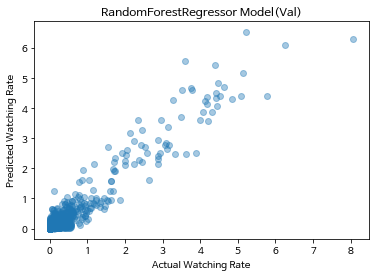

In [175]:
## val - 랜덤포레스트 최적화된 하이퍼파라미터로 오류 확인
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
pipe = clf.best_estimator_
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)

print(f'RandomForestRegressor_검증 세트 r2: {r2:.10f}')
print(f'RandomForestRegressor_검증 세트 조정된 r2: {adj_r2(r2, X_val.shape[0], X_val.shape[1]):.10f}')
print(f'RandomForestRegressor_검증 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("RandomForestRegressor Model(Val)")
plt.show()

### 2.2.3. 테스트 데이터 세트

RandomForestRegressor_테스트 세트 r2: 0.8724048656
RandomForestRegressor_테스트 세트 조정된 r2: 0.8722365660
RandomForestRegressor_테스트 세트 MSE: 0.0297324055
------------------------------------------------------------


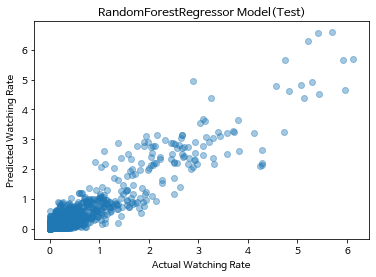

In [176]:
### Test - 랜덤포레스트 최적화된 하이퍼파라미터 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
pipe = clf.best_estimator_
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'RandomForestRegressor_테스트 세트 r2: {r2:.10f}')
print(f'RandomForestRegressor_테스트 세트 조정된 r2: {adj_r2(r2, X_test.shape[0], X_test.shape[1]):.10f}')
print(f'RandomForestRegressor_테스트 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("RandomForestRegressor Model(Test)")
plt.show()

## 2.3. Multiple Linear Regression 모델 적용 및 평가지표 확인

In [177]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
X_train_encoded = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train
X_val_encoded = encoder.transform(X_val) #X_val_encoded
X_test_encoded = encoder.transform(X_test) #X_test_encoded
# TargetEncoder().fit(X_train)
lr.fit(X_train_encoded, y_train)
X_train_encoded.shape, X_val_encoded.shape, X_test_encoded.shape

((11231, 235), (2808, 235), (5315, 235))

### 2.3.1. 훈련 데이터 세트

LinearRegression_훈련 세트 r2: 0.9043877854
LinearRegression_훈련 세트 조정된 r2: 0.9023442320
LinearRegression_훈련 세트 MSE: 0.0257781727
------------------------------------------------------------


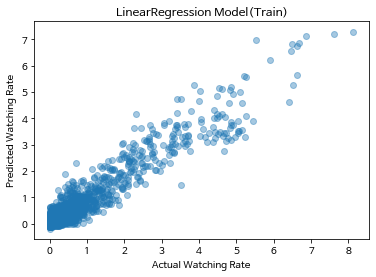

In [178]:
## Train - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
y_pred = lr.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
print(f'LinearRegression_훈련 세트 r2: {r2:.10f}')
print(f'LinearRegression_훈련 세트 조정된 r2: {adj_r2(r2, X_train_encoded.shape[0], X_train_encoded.shape[1]):.10f}')
print(f'LinearRegression_훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("LinearRegression Model(Train)")
plt.show()

In [179]:
X_train.shape, X_train_encoded.shape

((11231, 7), (11231, 235))

In [180]:
X_val.shape, X_val_encoded.shape

((2808, 7), (2808, 235))

### 2.3.2. 검증 데이터 세트

LinearRegression_검증 세트 r2: -24619092226249912320.0000000000
LinearRegression_검증 세트 조정된 r2: -26868503841012248576.0000000000
LinearRegression_검증 세트 MSE: 7,593,765,076,998,982,656.0000000000
------------------------------------------------------------


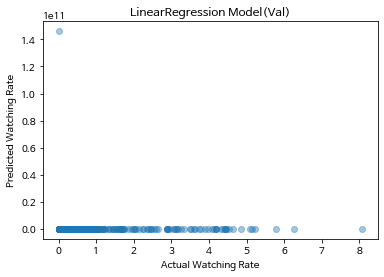

In [181]:
## Val - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_val[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
# X_train = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train

y_pred = lr.predict(X_val_encoded)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'LinearRegression_검증 세트 r2: {r2:.10f}')
print(f'LinearRegression_검증 세트 조정된 r2: {adj_r2(r2, X_val_encoded.shape[0], X_val_encoded.shape[1]):.10f}')
print(f'LinearRegression_검증 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("LinearRegression Model(Val)")
plt.show()

### 2.3.3. 테스트 데이터 세트

LinearRegression_테스트 세트 r2: -474343649746224349184.0000000000
LinearRegression_테스트 세트 조정된 r2: -496291032634659635200.0000000000
LinearRegression_테스트 세트 MSE: 110,532,253,508,689,444,864.0000000000
------------------------------------------------------------


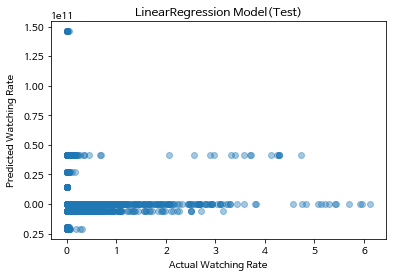

In [182]:
## Test - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

y_pred = lr.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'LinearRegression_테스트 세트 r2: {r2:.10f}')
print(f'LinearRegression_테스트 세트 조정된 r2: {adj_r2(r2, X_test_encoded.shape[0], X_test_encoded.shape[1]):.10f}')
print(f'LinearRegression_테스트 세트 MSE: {mse:,.10f}')

print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("LinearRegression Model(Test)")
plt.show()

## 2.4. XGBoostRegression 모델 적용 및 평가 지표 확인 

In [183]:
from xgboost import XGBRegressor

# scaled_columns = ['m_20', 'f_20', 'f_30']

# MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
# encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
# X_train_encoded = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train
# X_val_encoded = encoder.fit_transform(X_val)

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
    )

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:0.512216	validation_1-rmse:0.533563
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.424223	validation_1-rmse:0.442921
[2]	validation_0-rmse:0.355672	validation_1-rmse:0.371542
[3]	validation_0-rmse:0.302257	validation_1-rmse:0.313957
[4]	validation_0-rmse:0.261043	validation_1-rmse:0.271589
[5]	validation_0-rmse:0.2291	validation_1-rmse:0.239282
[6]	validation_0-rmse:0.20554	validation_1-rmse:0.21858
[7]	validation_0-rmse:0.187826	validation_1-rmse:0.200907
[8]	validation_0-rmse:0.174886	validation_1-rmse:0.188685
[9]	validation_0-rmse:0.165652	validation_1-rmse:0.18105
[10]	validation_0-rmse:0.159088	validation_1-rmse:0.175595
[11]	validation_0-rmse:0.154106	validation_1-rmse:0.172105
[12]	validation_0-rmse:0.150676	validation_1-rmse:0.169934
[13]	validation_0-rmse:0.148122	validation_1-rmse:0.168121
[14]	validation_0-rmse:0.14614

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

### 2.4.1. 훈련 데이터 세트

XGBoostRegression_훈련 세트 r2: 0.9456443486
XGBoostRegression_훈련 세트 조정된 r2: 0.9444825861
XGBoostRegression_훈련 세트 MSE: 0.0146549201
------------------------------------------------------------


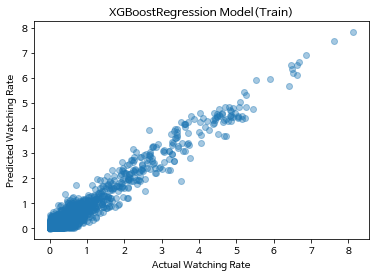

In [221]:
## Train - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
y_pred = boosting.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
print(f'XGBoostRegression_훈련 세트 r2: {r2:.10f}')
print(f'XGBoostRegression_훈련 세트 조정된 r2: {adj_r2(r2, X_train_encoded.shape[0], X_train_encoded.shape[1]):.10f}')
print(f'XGBoostRegression_훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(Train)")
plt.show()

In [185]:
y_pred = boosting.predict(X_train_encoded)
print('R^2', r2_score(y_train, y_pred))
print(f'검증세트 r2: {r2:.10f}')
print(f'검증세트 조정된 r2: {adj_r2(r2, X_test.shape[0], X_test.shape[1]):.10f}')
print(f'검증세트 MSE: {mse:,.10f}')

R^2 0.9456443485700641
검증세트 r2: 0.9456443486
검증세트 조정된 r2: 0.9455726528
검증세트 MSE: 0.0146549201


### 2.4.2. 검증 데이터 세트

XGBoostRegression_검증 세트 r2: 0.9156379361
XGBoostRegression_검증 세트 조정된 r2: 0.9079298937
XGBoostRegression_검증 세트 MSE: 0.0260214995
------------------------------------------------------------


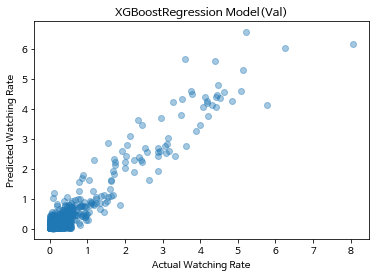

In [186]:
## Val - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

y_pred = boosting.predict(X_val_encoded)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'XGBoostRegression_검증 세트 r2: {r2:.10f}')
print(f'XGBoostRegression_검증 세트 조정된 r2: {adj_r2(r2, X_val_encoded.shape[0], X_val_encoded.shape[1]):.10f}')
print(f'XGBoostRegression_검증 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(Val)")
plt.show()

In [187]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

R^2 0.9156379360613542


### 2.4.3. 테스트 데이터 세트

XGBoostRegression_테스트 세트 r2: 0.8825560181
XGBoostRegression_테스트 세트 조정된 r2: 0.8771220083
XGBoostRegression_테스트 세트 MSE: 0.0273669691
------------------------------------------------------------


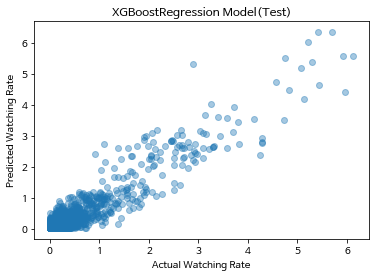

In [188]:
## Test - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

y_pred = boosting.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'XGBoostRegression_테스트 세트 r2: {r2:.10f}')
print(f'XGBoostRegression_테스트 세트 조정된 r2: {adj_r2(r2, X_test_encoded.shape[0], X_test_encoded.shape[1]):.10f}')
print(f'XGBoostRegression_테스트 세트 MSE: {mse:,.10f}')

print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(Test)")
plt.show()

## 2.5. XGBoostRegression RandomizedSearchCV 모델 적용 및 평가지표 확인

In [189]:
## XGB 하이퍼 파라미터 튜닝 
xgb_param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': [4, 5, 6, 7, 8, None],
    'subsample': np.linspace(0.4, 1, 7),
    'lamda': np.linspace(0.4, 1, 7)}

# Create a random search object
xgb_random = RandomizedSearchCV(boosting,
                                param_distributions = xgb_param_grid,
                                n_iter = 10,
                                scoring='neg_mean_squared_error', 
                                n_jobs=-1, 
                                cv = 3, 
                                refit=True, 
                                return_train_score = True)

# Fit to the training data
xgb_random.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(learning_rate=0.2, n_estimators=1000,
                                          n_jobs=-1,
                                          objective='reg:squarederror'),
                   n_jobs=-1,
                   param_distributions={'lamda': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [4, 5, 6, 7, 8, None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffac2761490>,
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [231]:
xgb_random.best_estimator_ 
#XGBRegressor(lamda=0.8, learning_rate=0.2, max_depth=4, n_estimators=390,
            #  n_jobs=-1, objective='reg:squarederror', subsample=0.8)
#XGBRegressor(lamda=0.5, learning_rate=0.2, max_depth=4, n_estimators=91,
            #  n_jobs=-1, objective='reg:squarederror', subsample=0.7)
# XGBRegressor(lamda=0.4, learning_rate=0.2, max_depth=6, n_estimators=146,
#              n_jobs=-1, objective='reg:squarederror',
#              subsample=0.8999999999999999)
# XGBRegressor(lamda=0.4, learning_rate=0.2, max_depth=7, n_estimators=125,
#              n_jobs=-1, objective='reg:squarederror',
#              subsample=0.8999999999999999)

XGBRegressor(lamda=0.4, learning_rate=0.2, max_depth=7, n_estimators=125,
             n_jobs=-1, objective='reg:squarederror',
             subsample=0.8999999999999999)

### 2.5.1. 훈련 데이터 세트

XGBoostRegression(CV)_훈련 세트 r2: 0.9832444154
XGBoostRegression(CV)_훈련 세트 조정된 r2: 0.9828862924
XGBoostRegression(CV)_훈련 세트 MSE: 0.0146549201
------------------------------------------------------------


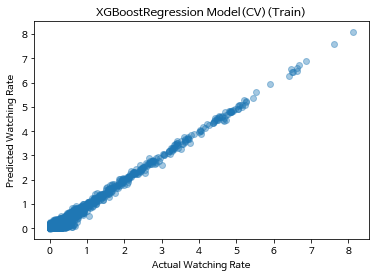

In [222]:
# train - XGB 모델 오류 확인 (RandomizedSearchCV)

boost = xgb_random.best_estimator_
# boost = XGBRegressor(lamda=0.8, learning_rate=0.2, max_depth=4, n_estimators=390, n_jobs=-1, objective='reg:squarederror', subsample=0.8)
# eval_set = [(X_train_encoded, y_train),(X_val_encoded, y_val)]
# boost.fit(X_train_encoded, y_train,eval_set=eval_set,early_stopping_rounds=50)

y_pred = boost.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)

print(f'XGBoostRegression(CV)_훈련 세트 r2: {r2:.10f}')
print(f'XGBoostRegression(CV)_훈련 세트 조정된 r2: {adj_r2(r2, X_train_encoded.shape[0], X_train_encoded.shape[1]):.10f}')
print(f'XGBoostRegression(CV)_훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(CV)(Train)")
plt.show()

### 2.5.2. 검증 데이터 세트

XGBoostRegression(CV)_검증 세트 r2: 0.9114488436
XGBoostRegression(CV)_검증 세트 조정된 r2: 0.9033580497
XGBoostRegression(CV)_검증 세트 MSE: 0.0146549201


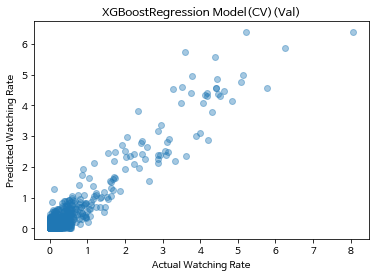

In [223]:
# val - XGB 모델 오류 확인 (RandomizedSearchCV)

y_pred = boost.predict(X_val_encoded)
r2 = r2_score(y_val, y_pred)
print(f'XGBoostRegression(CV)_검증 세트 r2: {r2:.10f}')
print(f'XGBoostRegression(CV)_검증 세트 조정된 r2: {adj_r2(r2, X_val_encoded.shape[0], X_val_encoded.shape[1]):.10f}')
print(f'XGBoostRegression(CV)_검증 세트 MSE: {mse:,.10f}')
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(CV)(Val)")
plt.show()

### 2.5.3. 테스트 데이터 세트

XGBoostRegression(CV)_테스트 세트 r2: 0.8739848697
XGBoostRegression(CV)_테스트 세트 조정된 r2: 0.8681542819
XGBoostRegression(CV)_테스트 세트 MSE: 0.0146549201


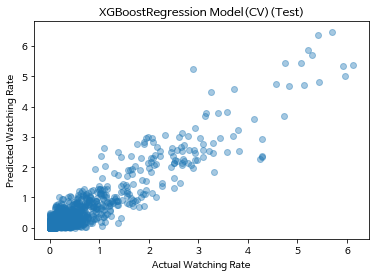

In [224]:
# Test - XGB 모델 오류 확인 (RandomizedSearchCV)

y_pred = boost.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
print(f'XGBoostRegression(CV)_테스트 세트 r2: {r2:.10f}')
print(f'XGBoostRegression(CV)_테스트 세트 조정된 r2: {adj_r2(r2, X_test_encoded.shape[0], X_test_encoded.shape[1]):.10f}')
print(f'XGBoostRegression(CV)_테스트 세트 MSE: {mse:,.10f}')
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBoostRegression Model(CV)(Test)")
plt.show()

# 3.모델 설명

## 3.1. Gain 기준

In [225]:
boost.get_booster().get_score(importance_type="gain")

{'chanel_AXN': 0.11615998844285715,
 'chanel_CNTV': 0.017190086703666667,
 'chanel_DRAMAcube': 0.0390054460067,
 'chanel_DramaH': 0.030859504112559097,
 'chanel_Dramax': 0.026522490202000003,
 'chanel_JNG KOREA': 0.025297561251857146,
 'chanel_JTBC': 0.041668393049642864,
 'chanel_JTBC2': 0.009454278468999999,
 'chanel_K-STAR': 0.02993868105,
 'chanel_KBS DRAMA': 0.22206731903168891,
 'chanel_KBS Story': 0.04085774726777778,
 'chanel_KBS1': 0.3861068325034815,
 'chanel_KBS2': 0.28450509422238174,
 'chanel_KTV': 0.1092484773515,
 'chanel_MBC': 0.3040909087545668,
 'chanel_MBC every1': 0.01869996152,
 'chanel_O tvN': 0.11106917016175859,
 "chanel_O'live": 0.07460092270293335,
 'chanel_OBS': 0.0375732891,
 'chanel_OCN': 0.00975295901,
 'chanel_OCN Thrills': 0.0259281965,
 'chanel_ONCE': 0.054083211358625004,
 'chanel_On Style': 0.020768957586,
 'chanel_SBS': 0.46161316249485496,
 'chanel_SBS플러스': 0.036027563653883994,
 'chanel_SKY': 0.02065958416472,
 'chanel_SKYUHD': 0.032373843702,
 'ch

In [195]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [196]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

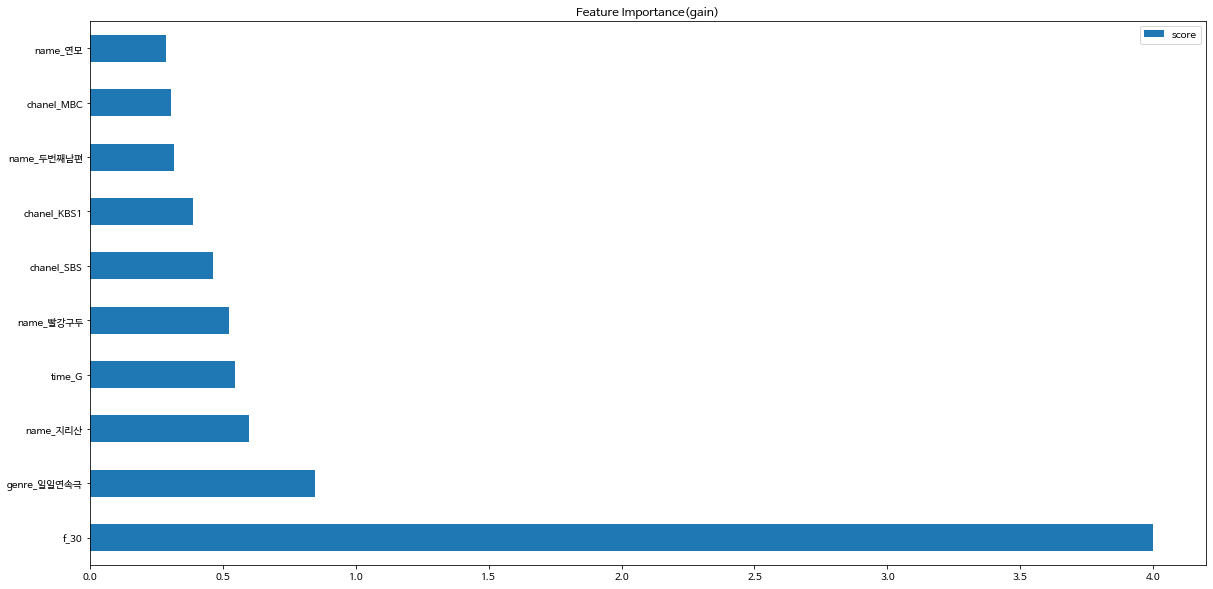

In [226]:
### gain
feature_important = boost.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data22 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data22.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10), title = 'Feature Importance(gain)') ## plot top 10 features

## 3.2. Weight 기준

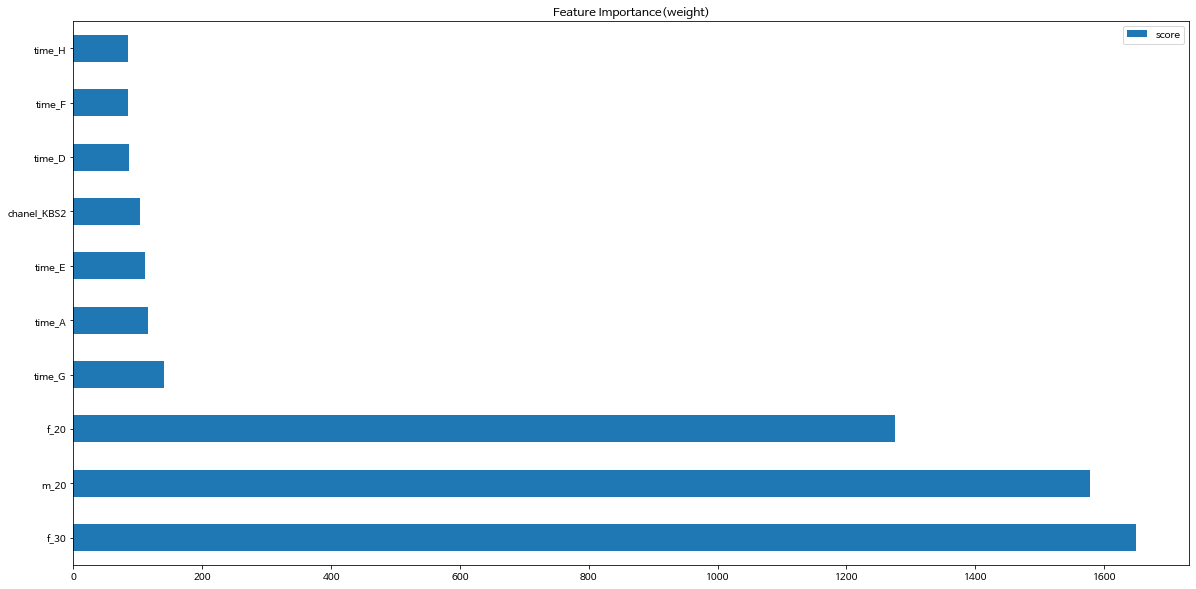

In [197]:
### weight
feature_important = boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data22 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data22.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10), title = 'Feature Importance(weight)') ## plot top 10 features

## 3.3. Cover 기준

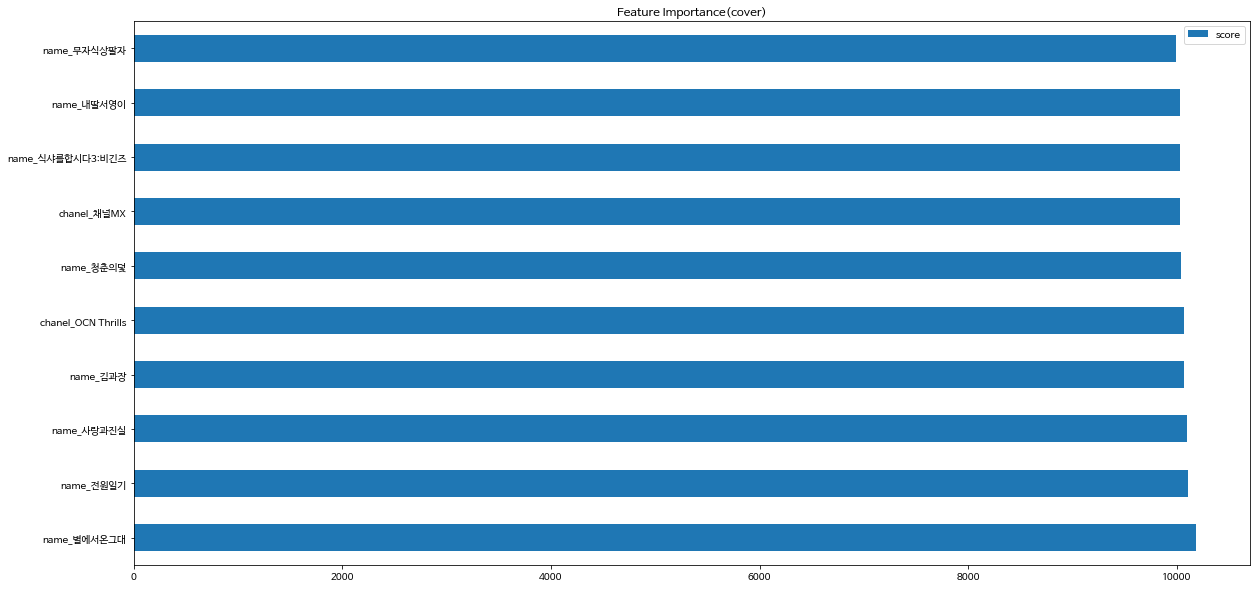

In [227]:
feature_important = boost.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data22 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data22.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10), title = 'Feature Importance(cover)') ## plot top 10 features

In [219]:
from sklearn.inspection import permutation_importance

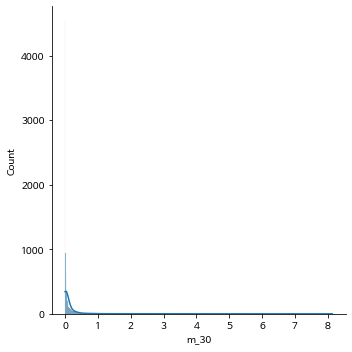

In [201]:
%matplotlib inline
import seaborn as sns
sns.displot(y_train, kde=True);

In [229]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 생성
permuter = PermutationImportance(
    boost,
    scoring='neg_mean_squared_error',
    n_iter=3,
    random_state=1)

# permutation importance 계산
permuter.fit(X_test_encoded, y_test)

# 결과 확인
feature_names = list(X_test_encoded.columns)
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

f_30             0.215670
f_20             0.029596
m_20             0.007641
chanel_SBS       0.001856
time_G           0.001545
                   ...   
time_A          -0.000054
name_응답하라1994   -0.000069
time_C          -0.000108
name_어사와조이      -0.000260
chanel_KBS2     -0.000648
Length: 235, dtype: float64

## 3.4. PDP Graph

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac29104d0>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac2882850>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa87469390>})

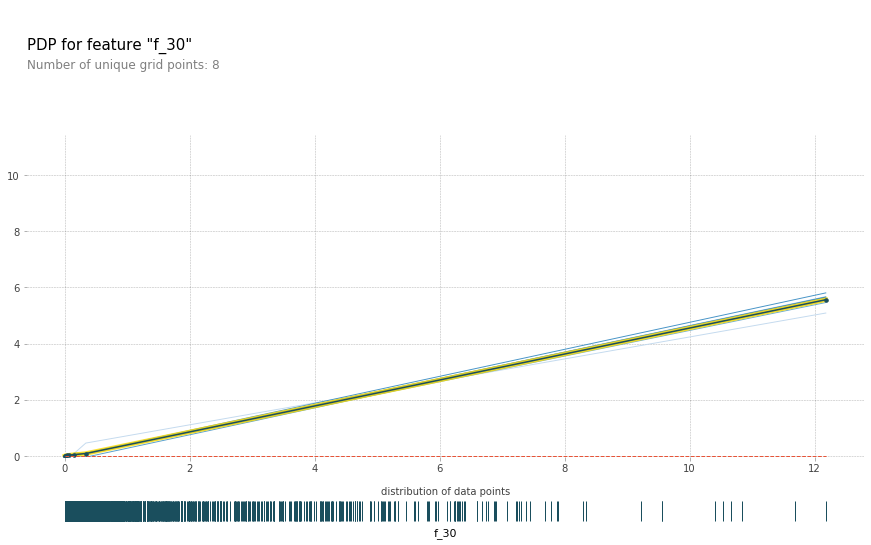

In [202]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'f_30'

isolated = pdp_isolate(
    model=boost, 
    dataset=X_train_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

# pdp_plot(isolated, feature_name=feature);
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa97bb85d0>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac2732e10>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa97b90f10>})

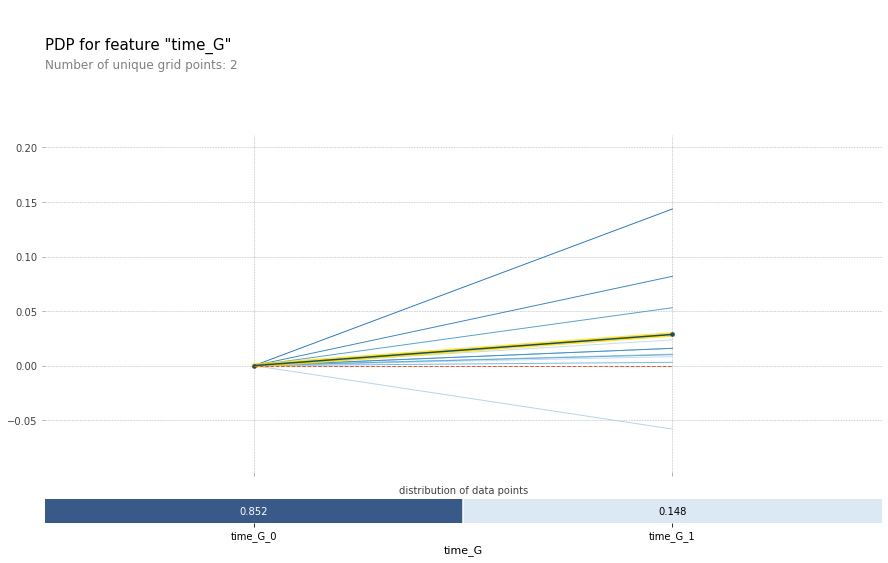

In [204]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'time_G'

isolated = pdp_isolate(
    model=boost, 
    dataset=X_train_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

# pdp_plot(isolated, feature_name=feature);
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa1bb652d0>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa1bbb1f10>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffa1bb71b10>})

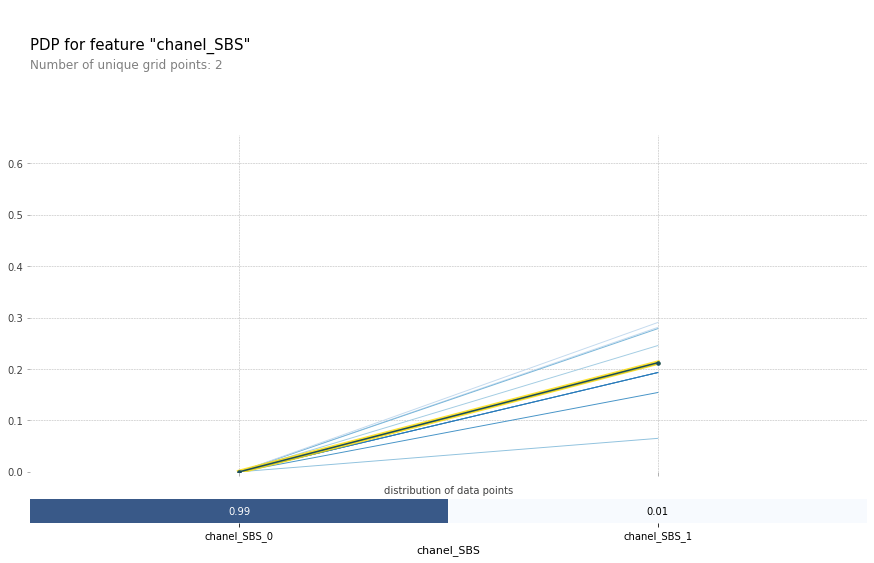

In [230]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'chanel_SBS'

isolated = pdp_isolate(
    model=boost, 
    dataset=X_train_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

# pdp_plot(isolated, feature_name=feature);
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

In [205]:
X_train_encoded['time_G'].value_counts()

0    9568
1    1663
Name: time_G, dtype: int64

In [ ]:
X_train_encoded.columns.tolist()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


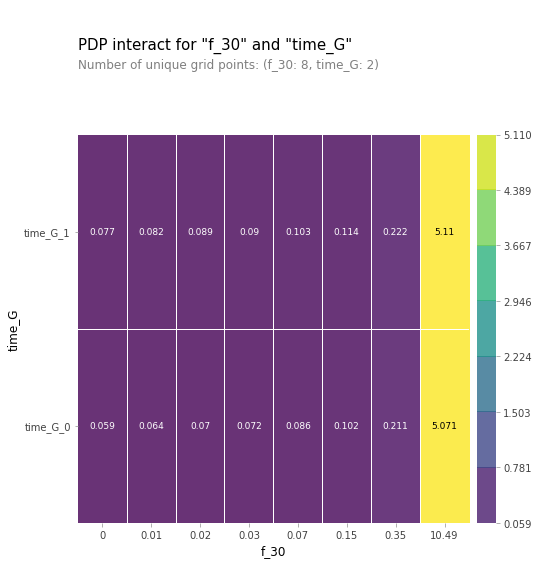

In [215]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['f_30', 'time_G']

interaction = pdp_interact(
    model=boost, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

## 3.5. SHAP Graph

In [216]:
import shap
explainer = shap.TreeExplainer(boost)
shap_values = explainer.shap_values(X_test_encoded)

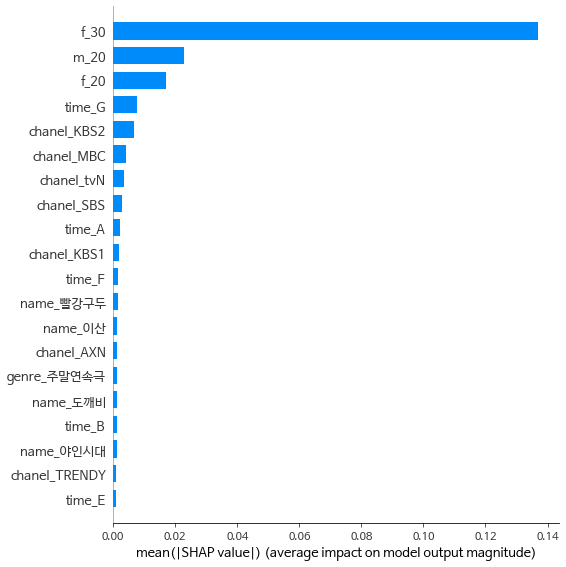

In [233]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

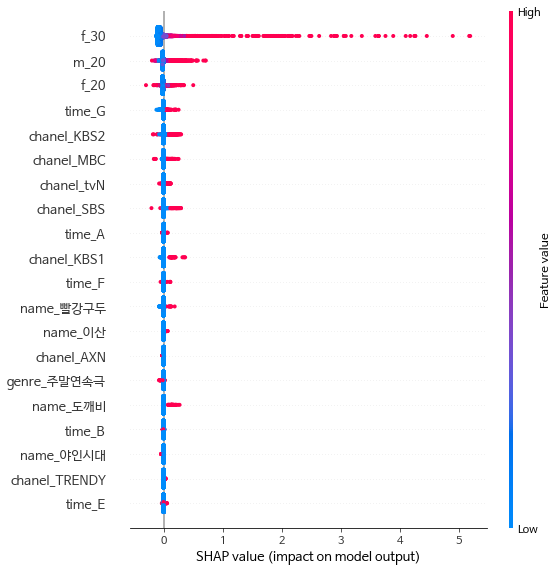

In [209]:
shap.summary_plot(shap_values, X_test_encoded)

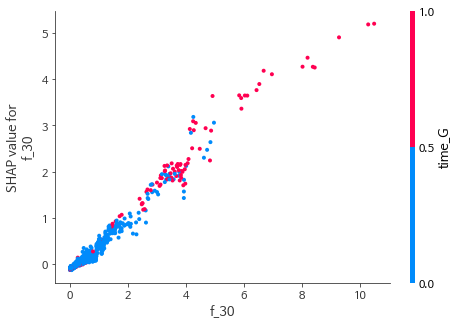

In [210]:
shap.dependence_plot("f_30", shap_values, X_test_encoded)

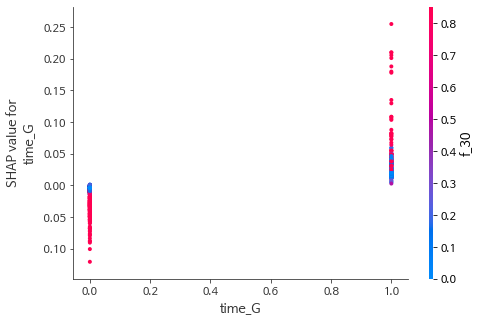

In [212]:
shap.dependence_plot("time_G", shap_values, X_test_encoded)